In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
def read_data(file_path):
    '''Read Excel File'''
    
    df = pd.read_excel(file_path, engine = 'openpyxl')

    return df

In [117]:
def prep_time_per_task(df):
    '''Extract time relevant data for each student per question and create new df'''
    
    task_time_df = (
    df.groupby(['candidate_id', 'question_number'], as_index=False)
      .first() 
      [['candidate_id', 'question_number', 'question_title', 'question_duration_seconds', 
        'incident_time_mins', 'auto_score_per_question', 'max_question_score']]
      .copy()
    )
		
    return task_time_df

In [118]:
def convert_seconds_to_minutes(df):
    df['actual_time_per_questions_mins'] = round(df['question_duration_seconds']/60, 2)
    return df

In [119]:
def calculate_ideal_time_per_task(df):
    df['expected_time_spent (mins)'] = round(210 * task_time_df['max_question_score'] / 100, 2)
    return df

In [120]:
def calculate_stats(df):
    # Ideal time comparison
    df['over_ideal_time'] = df['actual_time_per_questions_mins'] - df['expected_time_spent (mins)']
    # df['pct_of_ideal_time'] = df['actual_time_per_questions_mins'] / df['expected_time_spent (mins)'] * 100

    # Score as percentage
    # df['pct_score'] = df['auto_score_per_question'] / df['max_question_score'] * 100

    return df


In [181]:

def plot_expected_vs_actual(df):
    """ Melt a dataframe from wide to long data and plot a grouped barplot of expected vs actual time per question. """

    grouped_df = df.groupby('question_number').agg({
    'expected_time_spent (mins)': 'first',
    'actual_time_per_questions_mins': 'mean',
    'auto_score_per_question' : 'mean'
    }).reset_index()

    # Melt the dataframe
    melted = pd.melt(
        grouped_df,
        id_vars='question_number',
        value_vars=['expected_time_spent (mins)', 'actual_time_per_questions_mins'],
        var_name='Time Type',
        value_name='Minutes'
    )

    # define own colors
    colors = ['#6ca6c3', '#82172b']
    
    # Plot
    plt.figure(figsize=(12,6))
    sns.barplot(
        data=melted,
        x='question_number',
        y='Minutes',
        hue='Time Type',
        palette= colors
    )
    plt.xlabel('Question Number')
    plt.ylabel('Time (mins)')
    plt.title('Actual Avg Time vs. Expected Time Spent per Question')
    plt.legend(title='')
    plt.tight_layout()
    plt.show()

In [146]:
def plot_over_under_ideal_time(df):
    
    df.sort_values('over_ideal_time', ascending=False, inplace=True)

    plt.figure(figsize=(12,6))
    sns.barplot(
    data=df,
    x='question_number',
    y='over_ideal_time',
    hue='question_number',
    palette='RdBu',
    legend=False,
    errorbar=None
    )

    plt.axhline(0, color='black', linestyle='--')
    plt.xlabel('Question Number')
    plt.ylabel('Minutes Over/Under Ideal')
    plt.title('Time Over/Under Ideal per Question')
    plt.tight_layout()
    plt.show()


In [123]:
def run_analysis(file_path):

    # Read Data
    df = read_data(file_path)

    # prep and extract data from original df for time per task analysis
    task_time_df = prep_time_per_task(df)

    # convert time taken per task from second to minutes
    task_time_df = convert_seconds_to_minutes(task_time_df)

    # calculate ideal time 
    task_time_df = calculate_ideal_time_per_task(task_time_df)

    task_time_df = calculate_stats(task_time_df)

    return task_time_df


In [124]:
def export_data(df, output_path, file_format='xlsx'):
    """
    Save cleaned data to file 
    Args:
        df (pandas.DataFrame): Cleaned DataFrame
        output_path (str): Path to save the file
        file_format (str): Format to save ('xlsx', 'csv', 'json')
    """
    try:
        if file_format == 'xlsx':
            df.to_excel(output_path, index=False)
        elif file_format == 'csv':
            df.to_csv(output_path, index=False)
        elif file_format == 'json':
            df.to_json(output_path, orient='records', indent=2)
        else:
            raise ValueError(f"Unsupported format: {file_format}")
        
        print(f"Data saved successfully to {output_path}")
    except Exception as e:
        print(f"Error saving data: {e}")

In [131]:
# correlation = task_time_df[['actual_time_per_questions_mins', 'auto_score_per_question']].corr().iloc[0,1]
# print(f"Correlation between time spent and score (all rows): {correlation:.2f}")

Correlation between time spent and score (all rows): 0.12


### Execute Analysis

In [132]:
task_time_df = run_analysis("data/cleaned_data.xlsx")

In [133]:
export_data(task_time_df, 'processed data/Time_Per_Question_Analysis_2024.xlsx', 'xlsx')

Data saved successfully to processed data/Time_Per_Question_Analysis_2024.xlsx


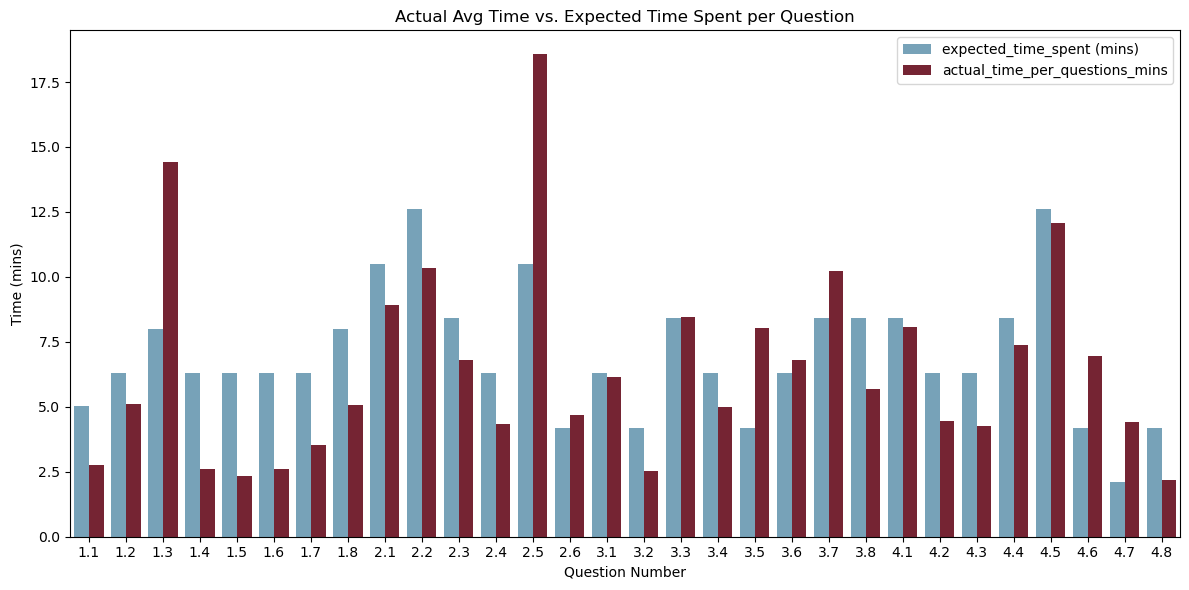

In [182]:
plot_expected_vs_actual(task_time_df)

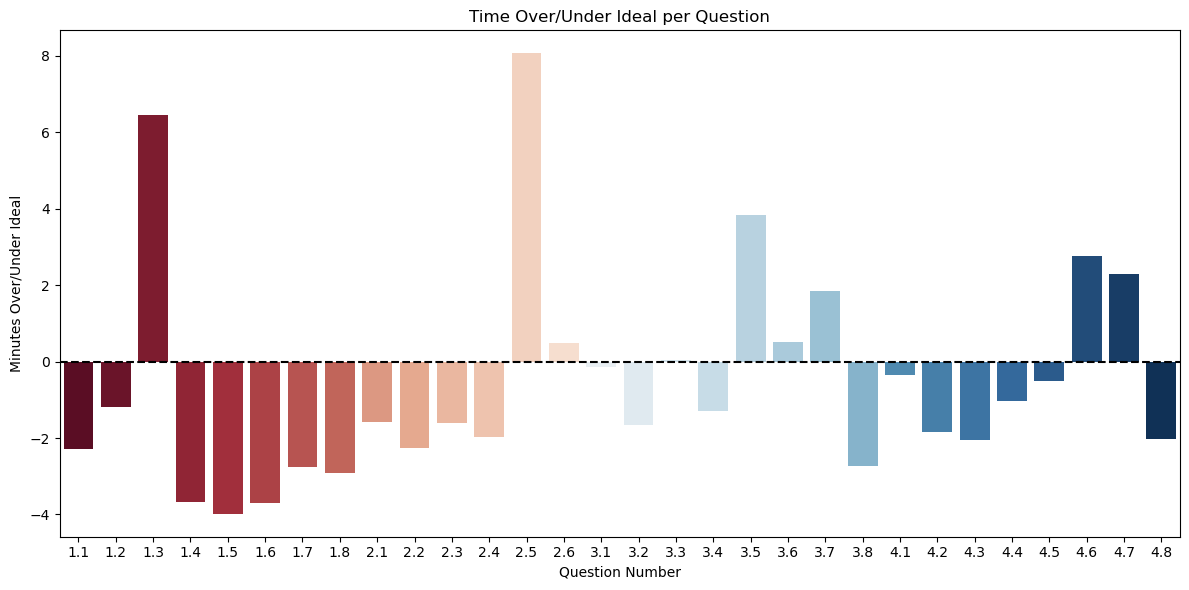

In [147]:
plot_over_under_ideal_time(task_time_df)